In [5]:
%run setup.ipynb

In [18]:
fine_base, fine_baseinfo = load_function("fine_base.tar")
fine_base.eval()
base, baseinfo = load_function("base_lr0.0005.tar")
base.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def plot_loss(title, info, ax, ylim_top=0.5, ylim_bot=0, xlim_top=11, xlim_bot=0):
    train = info["train_loss"]
    val = info["val_loss"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

def plot_acc(title, info, ax, ylim_top=1.01, ylim_bot=0.5, xlim_top=11, xlim_bot=0):
    train = info["train_acc"]
    val = info["val_acc"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

# Finetuning on augmented data  

In [8]:
# load in the basemodel (trained on non-augmented data while frozen)
model_aug1fine, info_aug1fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug1fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug1fine.parameters()), lr=lr)

# begin finetuning on the augmented data
model_aug1fine, info_aug1fine = train_model(model_aug1fine, optimizer, num_epoch=epochs, train=dataloader_train_aug1, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.2407 Acc: 0.9222
Val Loss: 0.0838 Acc: 0.9712
Epoch time 0m 52s
----------

Epoch 2/10
----------
Train Loss: 0.1239 Acc: 0.9629
Val Loss: 0.0541 Acc: 1.0000
Epoch time 2m 49s
----------

Epoch 3/10
----------
Train Loss: 0.0854 Acc: 0.9725
Val Loss: 0.0807 Acc: 0.9712
Epoch time 3m 4s
----------

Epoch 4/10
----------
Train Loss: 0.0870 Acc: 0.9760
Val Loss: 0.0922 Acc: 0.9712
Epoch time 3m 11s
----------

Epoch 5/10
----------
Train Loss: 0.0804 Acc: 0.9737
Val Loss: 0.0870 Acc: 0.9615
Epoch time 2m 49s
----------

Epoch 6/10
----------
Train Loss: 0.0543 Acc: 0.9820
Val Loss: 0.0575 Acc: 0.9904
Epoch time 2m 45s
----------

Epoch 7/10
----------
Train Loss: 0.0471 Acc: 0.9868
Val Loss: 0.0604 Acc: 0.9712
Epoch time 2m 50s
----------

Epoch 8/10
----------
Train Loss: 0.0361 Acc: 0.9868
Val Loss: 0.0555 Acc: 0.9808
Epoch time 2m 52s
----------

Epoch 9/10
----------
Train Loss: 0.0715 Acc: 0.9772
Val Loss: 0.1059 Acc: 0.9615
Epoch time 2m 46s
-----

In [11]:
# load in the basemodel (trained while frozen)
model_aug2fine, info_aug2fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug2fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug2fine.parameters()), lr=lr)

# begin finetuning
model_aug2fine, info_aug2fine = train_model(model_aug2fine, optimizer, num_epoch=epochs, train=dataloader_train_aug2, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.4663 Acc: 0.8371
Val Loss: 0.4113 Acc: 0.9038
Epoch time 0m 52s
----------

Epoch 2/10
----------
Train Loss: 0.2330 Acc: 0.9257
Val Loss: 0.5119 Acc: 0.8173
Epoch time 0m 53s
----------

Epoch 3/10
----------
Train Loss: 0.1477 Acc: 0.9569
Val Loss: 0.3429 Acc: 0.8654
Epoch time 0m 57s
----------

Epoch 4/10
----------
Train Loss: 0.1166 Acc: 0.9653
Val Loss: 0.2604 Acc: 0.8942
Epoch time 0m 50s
----------

Epoch 5/10
----------
Train Loss: 0.1231 Acc: 0.9569
Val Loss: 0.2811 Acc: 0.8846
Epoch time 0m 47s
----------

Epoch 6/10
----------
Train Loss: 0.1401 Acc: 0.9485
Val Loss: 0.3010 Acc: 0.8750
Epoch time 1m 33s
----------

Epoch 7/10
----------
Train Loss: 0.0896 Acc: 0.9737
Val Loss: 0.3489 Acc: 0.8654
Epoch time 3m 23s
----------

Epoch 8/10
----------
Train Loss: 0.0772 Acc: 0.9725
Val Loss: 0.2784 Acc: 0.9135
Epoch time 3m 27s
----------

Epoch 9/10
----------
Train Loss: 0.0797 Acc: 0.9725
Val Loss: 0.1631 Acc: 0.9519
Epoch time 3m 13s
----

In [12]:
# load in the basemodel (trained while frozen)
model_aug3fine, info_aug3fine = load_function("base_lr0.0005.tar")
unfreeze_layer4(model_aug3fine)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_aug3fine.parameters()), lr=lr)

# begin finetuning
model_aug3fine, info_aug3fine = train_model(model_aug3fine, optimizer, num_epoch=epochs, train=dataloader_train_aug3, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.4786 Acc: 0.8371
Val Loss: 0.3593 Acc: 0.9135
Epoch time 3m 18s
----------

Epoch 2/10
----------
Train Loss: 0.2063 Acc: 0.9377
Val Loss: 0.3467 Acc: 0.8750
Epoch time 3m 17s
----------

Epoch 3/10
----------
Train Loss: 0.1807 Acc: 0.9437
Val Loss: 0.3974 Acc: 0.8558
Epoch time 3m 28s
----------

Epoch 4/10
----------
Train Loss: 0.1697 Acc: 0.9485
Val Loss: 0.4394 Acc: 0.8654
Epoch time 3m 4s
----------

Epoch 5/10
----------
Train Loss: 0.1266 Acc: 0.9581
Val Loss: 0.3626 Acc: 0.8846
Epoch time 3m 28s
----------

Epoch 6/10
----------
Train Loss: 0.1167 Acc: 0.9653
Val Loss: 0.2363 Acc: 0.9423
Epoch time 3m 36s
----------

Epoch 7/10
----------
Train Loss: 0.1131 Acc: 0.9641
Val Loss: 0.3722 Acc: 0.8750
Epoch time 3m 46s
----------

Epoch 8/10
----------
Train Loss: 0.0894 Acc: 0.9737
Val Loss: 0.3526 Acc: 0.8942
Epoch time 4m 3s
----------

Epoch 9/10
----------
Train Loss: 0.0720 Acc: 0.9725
Val Loss: 0.2627 Acc: 0.9135
Epoch time 3m 19s
------

## Results from finetuning on augmented data

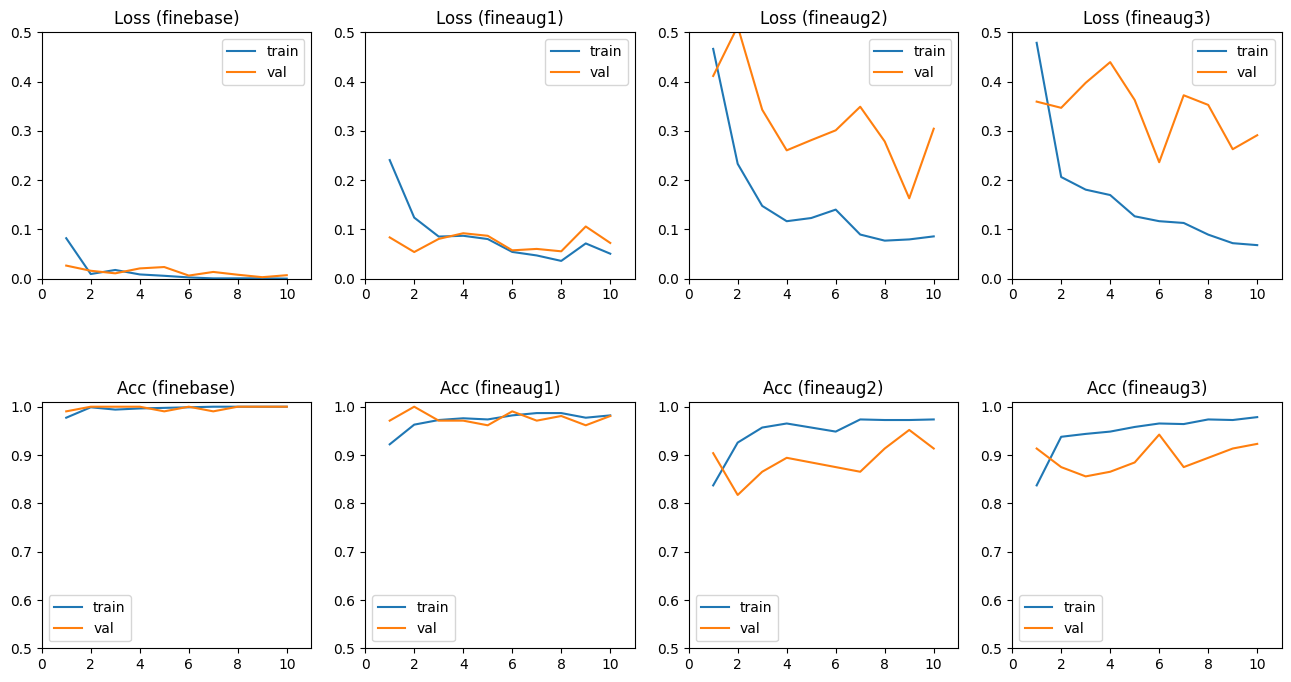

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(16,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (finebase)", fine_baseinfo, axs[0],)
plot_loss("Loss (fineaug1)", info_aug1fine, axs[1])
plot_loss("Loss (fineaug2)", info_aug2fine, axs[2])
plot_loss("Loss (fineaug3)", info_aug3fine, axs[3])
plot_acc("Acc (finebase)", fine_baseinfo, axs[4])
plot_acc("Acc (fineaug1)", info_aug1fine, axs[5])
plot_acc("Acc (fineaug2)", info_aug2fine, axs[6])
plot_acc("Acc (fineaug3)", info_aug3fine, axs[7])

In [14]:
# Accuracies
truel1, predl1 = labels_and_predictions(dataloader_test, model_aug1fine, device)
truel2, predl2 = labels_and_predictions(dataloader_test, model_aug2fine, device)
truel3, predl3 = labels_and_predictions(dataloader_test, model_aug3fine, device)

In [15]:
# Feeder accuracies
truel1feed, predl1feed = labels_and_predictions(dataloader_feeder, model_aug1fine, device)
truel2feed, predl2feed = labels_and_predictions(dataloader_feeder, model_aug2fine, device)
truel3feed, predl3feed = labels_and_predictions(dataloader_feeder, model_aug3fine, device)

In [20]:
print("\n-- Test accuracies:")
print("No finetuning: {:.4f}".format(baseinfo["test_acc"])) 
print("Finetuning regular: {:.4f}".format(fine_baseinfo["test_acc"]))
print("Finetuning on aug1: {:.4f}".format(accuracy(truel1, predl1))) 
print("Finetuning on aug2: {:.4f}".format(accuracy(truel2, predl2))) 
print("Finetuning on aug3: {:.4f}".format(accuracy(truel3, predl3)))
print("\n-- Feeder accuracies:")
print("No finetuning: {:.4f}".format(30.4463)) # stole it from afile where i had the patience to gen its predls for the feeder data zz
print("Finetuning regular: {:.4f}".format(fine_baseinfo["feed_acc"]))
print("Finetuning on aug1: {:.4f}".format(accuracy(truel1feed, predl1feed))) 
print("Finetuning on aug2: {:.4f}".format(accuracy(truel2feed, predl2feed))) 
print("Finetuning on aug3: {:.4f}".format(accuracy(truel3feed, predl3feed)))


-- Test accuracies:
No finetuning: 97.1429
Finetuning regular: 99.0476
Finetuning on aug1: 97.1429
Finetuning on aug2: 85.7143
Finetuning on aug3: 89.5238

-- Feeder accuracies:
No finetuning: 30.4463
Finetuning regular: 58.4256
Finetuning on aug1: 49.9702
Finetuning on aug2: 41.7468
Finetuning on aug3: 50.3283


In [21]:
save_function("fineonly_aug1.tar", model_aug1fine, info_aug1fine, extra_info={"test_acc": accuracy(truel1, predl1), "feeder_acc":accuracy(truel1feed, predl1feed), "finetuning":"layer 4, lr=0.0005, 10 epochs, aug1 data", "optimizer": "Adam with lr=0.0005"})
save_function("fineonly_aug2.tar", model_aug2fine, info_aug2fine, extra_info={"test_acc": accuracy(truel2, predl2), "feeder_acc":accuracy(truel2feed, predl2feed), "finetuning":"layer 4, lr=0.0005, 10 epochs, aug2 data", "optimizer": "Adam with lr=0.0005"})
save_function("fineonly_aug3.tar", model_aug3fine, info_aug3fine, extra_info={"test_acc": accuracy(truel3, predl3), "feeder_acc":accuracy(truel3feed, predl3feed), "finetuning":"layer 4, lr=0.0005, 10 epochs, aug3 data", "optimizer": "Adam with lr=0.0005"})